In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the selected data
selected_data = pd.read_csv('C:/Users/ksultana/Videos/Internship/selected_data.csv')

# Print the counts
counts = selected_data['selection_type'].value_counts()
print(counts)

# Prepare the data for modeling
# Assuming 'selection_type' is the target variable and the rest are features
X = selected_data.drop(columns=['selection_type'])
y = selected_data['selection_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights based on the inverse of class counts
class_counts = y_train.value_counts()
total_samples = len(y_train)

class_weights = {0: total_samples / class_counts[0],
                 1: total_samples / class_counts[1],
                 2: total_samples / class_counts[2]}

# Normalize the weights so that the maximum weight is 10
max_weight = max(class_weights.values())
class_weights_normalized = {key: value / max_weight * 10 for key, value in class_weights.items()}

# Create the logistic regression model with class weights
model_weighted = LogisticRegression(solver='liblinear', class_weight=class_weights_normalized).fit(X_train, y_train)

# Evaluate the model
y_pred_weighted = model_weighted.predict(X_test)

# Print the updated classification report with zero_division parameter set to avoid warnings
print("Classification Report with Adjusted Class Weights:")
print(classification_report(y_test, y_pred_weighted, zero_division=0))



0    517
2     20
1     19
Name: selection_type, dtype: int64
Classification Report with Adjusted Class Weights:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       106
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4

    accuracy                           0.94       112
   macro avg       0.32      0.33      0.32       112
weighted avg       0.90      0.94      0.92       112



In [5]:
# Perform logistic regression on the training set using solver='liblinear'
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[-0.06776055 -0.00466352  0.10727245  0.02546852 -0.05004533  0.01121562
  -0.00819828  0.30865087]
 [-0.44101208  0.03294478 -0.18206261 -0.03195452  0.08510038 -0.01099837
   0.04446777 -0.7304276 ]
 [ 0.08358026 -0.03887212 -0.05970568 -0.03995181  0.01476199 -0.03002094
  -0.05063952  0.16846254]]
Intercept: [ 1.09606666 -0.72696109 -0.37292618]


In [6]:
# Print the training and testing accuracy of the model
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.93
Testing Accuracy: 0.95


In [7]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, model.predict(X_test))
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[106   0   0]
 [  2   0   0]
 [  4   0   0]]


In [8]:
# Print the classification report
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
class_report = classification_report(y_test, model.predict(X_test))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       106
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4

    accuracy                           0.95       112
   macro avg       0.32      0.33      0.32       112
weighted avg       0.90      0.95      0.92       112



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the selected data
selected_data = pd.read_csv('C:/Users/ksultana/Videos/Internship/selected_data.csv')

# Separate features (X) and target variable (y)
X = selected_data.drop('selection_type', axis=1)
y = selected_data['selection_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define class weights based on the inverse of class counts
class_counts = y_train.value_counts()
class_weights = dict(1 / class_counts)

# Create and fit the RandomForestClassifier with class weights
rf = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       157
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         6

    accuracy                           0.94       167
   macro avg       0.31      0.33      0.32       167
weighted avg       0.88      0.94      0.91       167



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import warnings

# Load the selected data
selected_data = pd.read_csv('C:/Users/ksultana/Videos/Internship/selected_data.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_data.drop(columns=['selection_type']),
                                                    selected_data['selection_type'],
                                                    test_size=0.2,
                                                    random_state=42)

# Initialize candidate models with additional parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increased max_iter for convergence
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Filter warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)  # Added zero_division parameter
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{report}")


Training Logistic Regression...
Logistic Regression Accuracy: 0.9464285714285714
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       106
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4

    accuracy                           0.95       112
   macro avg       0.32      0.33      0.32       112
weighted avg       0.90      0.95      0.92       112

Training Random Forest...
Random Forest Accuracy: 0.9464285714285714
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       106
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4

    accuracy                           0.95       112
   macro avg       0.32      0.33      0.32       112
weighted avg       0.90      0.95      0.92       112



In [12]:
# Check class distribution
class_distribution = selected_data['selection_type'].value_counts()
print("Class Distribution:")
print(class_distribution)


Class Distribution:
0    517
2     20
1     19
Name: selection_type, dtype: int64


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.exceptions import ConvergenceWarning
import warnings

# Load the selected data
selected_data = pd.read_csv('C:/Users/ksultana/Videos/Internship/selected_data.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_data.drop(columns=['selection_type']),
                                                    selected_data['selection_type'],
                                                    test_size=0.2,
                                                    random_state=42)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=[0, 1, 2], y=selected_data['selection_type'])
class_weight_dict = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2]}

# Initialize candidate models with class weights
models = {
    'Logistic Regression': LogisticRegression(class_weight=class_weight_dict, max_iter=1000),  # Increased max_iter
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight=class_weight_dict, random_state=42)
}

# Filter convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)  # Added zero_division parameter
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{report}")



Training Logistic Regression...
Logistic Regression Accuracy: 0.4642857142857143
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.46      0.62       106
           1       0.05      0.50      0.08         2
           2       0.05      0.50      0.10         4

    accuracy                           0.46       112
   macro avg       0.35      0.49      0.27       112
weighted avg       0.89      0.46      0.59       112

Training Random Forest...
Random Forest Accuracy: 0.9464285714285714
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       106
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4

    accuracy                           0.95       112
   macro avg       0.32      0.33      0.32       112
weighted avg       0.90      0.95      0.92       112



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
from imblearn.over_sampling import RandomOverSampler
import warnings

# Load the selected data
selected_data = pd.read_csv('C:/Users/ksultana/Videos/Internship/selected_data.csv')

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(selected_data.drop(columns=['selection_type']), selected_data['selection_type'])

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize candidate models with resampled data
models_resampled = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increased max_iter
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Filter convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Train and evaluate each model with resampled data
for name, model in models_resampled.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred_resampled = model.predict(X_test_resampled)
    accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
    report_resampled = classification_report(y_test_resampled, y_pred_resampled, zero_division=0)  # Added zero_division parameter
    print(f"{name} Accuracy: {accuracy_resampled}")
    print(f"{name} Classification Report:\n{report_resampled}")



Training Logistic Regression...
Logistic Regression Accuracy: 0.6913183279742765
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.43      0.50       110
           1       0.76      0.92      0.83       106
           2       0.66      0.75      0.70        95

    accuracy                           0.69       311
   macro avg       0.68      0.70      0.68       311
weighted avg       0.68      0.69      0.68       311

Training Random Forest...
Random Forest Accuracy: 0.9935691318327974
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       1.00      1.00      1.00       106
           2       0.98      1.00      0.99        95

    accuracy                           0.99       311
   macro avg       0.99      0.99      0.99       311
weighted avg       0.99      0.99      0.99       311



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
from imblearn.over_sampling import RandomOverSampler
import warnings

# Load the selected data
selected_data = pd.read_csv('C:/Users/ksultana/Videos/Internship/selected_data.csv')

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(selected_data.drop(columns=['selection_type']), selected_data['selection_type'])

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the grid of hyperparameters for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500, 1000]  # Added max_iter parameter
}

# Initialize GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), 
                              param_grid_lr, 
                              cv=5, 
                              scoring='accuracy')

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Perform grid search using resampled data
grid_search_lr.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params_lr = grid_search_lr.best_params_

# Get the best model
best_model_lr = grid_search_lr.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters for Logistic Regression:")
print(best_params_lr)

# Evaluate the best model on the test data
y_pred_lr = best_model_lr.predict(X_test_resampled)
accuracy_lr = accuracy_score(y_test_resampled, y_pred_lr)
print("Accuracy of Logistic Regression on Test Data:", accuracy_lr)

# Print classification report
report_lr = classification_report(y_test_resampled, y_pred_lr, zero_division=0)
print("Classification Report for Logistic Regression:\n", report_lr)


Best Hyperparameters for Logistic Regression:
{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy of Logistic Regression on Test Data: 0.707395498392283
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.68      0.37      0.48       110
           1       0.75      0.95      0.84       106
           2       0.67      0.82      0.74        95

    accuracy                           0.71       311
   macro avg       0.70      0.72      0.69       311
weighted avg       0.70      0.71      0.68       311



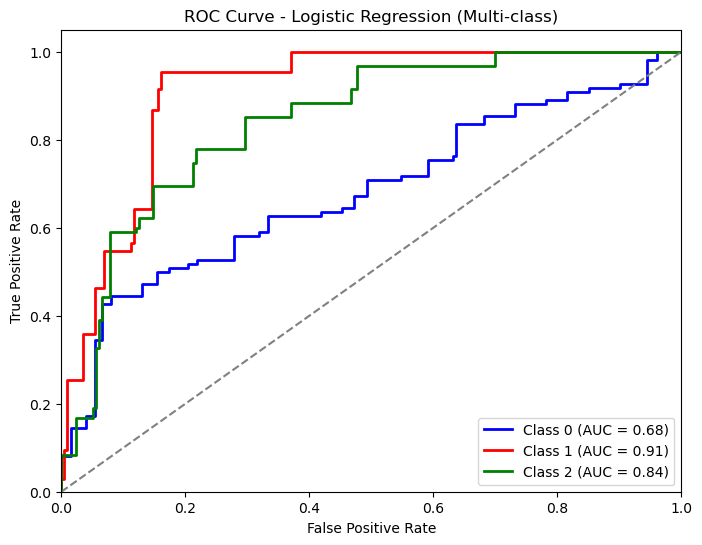

In [22]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for each class
y_probs_lr = best_model_lr.predict_proba(X_test_resampled)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming there are 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs_lr[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_probs_lr[:, i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Multi-class)')
plt.legend(loc='lower right')
plt.show()





In [16]:
# Define the grid of hyperparameters for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), 
                              param_grid_rf, 
                              cv=5, 
                              scoring='accuracy')

# Perform grid search
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Get the best model
best_model_rf = grid_search_rf.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:")
print(best_params_rf)

# Evaluate the best model
y_pred_rf = best_model_rf.predict(X_test_resampled)
accuracy_rf = accuracy_score(y_test_resampled, y_pred_rf)
print("Accuracy of Random Forest on Test Data:", accuracy_rf)


Best Hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy of Random Forest on Test Data: 1.0


Best Hyperparameters for Logistic Regression:
{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy of Logistic Regression on Test Data: 0.707395498392283
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.68      0.37      0.48       110
           1       0.75      0.95      0.84       106
           2       0.67      0.82      0.74        95

    accuracy                           0.71       311
   macro avg       0.70      0.72      0.69       311
weighted avg       0.70      0.71      0.68       311

Cross-validation scores for Random Forest: [0.99678457 0.99677419 0.99677419 1.         1.        ]
Mean cross-validation accuracy for Random Forest: 0.9980665906026346


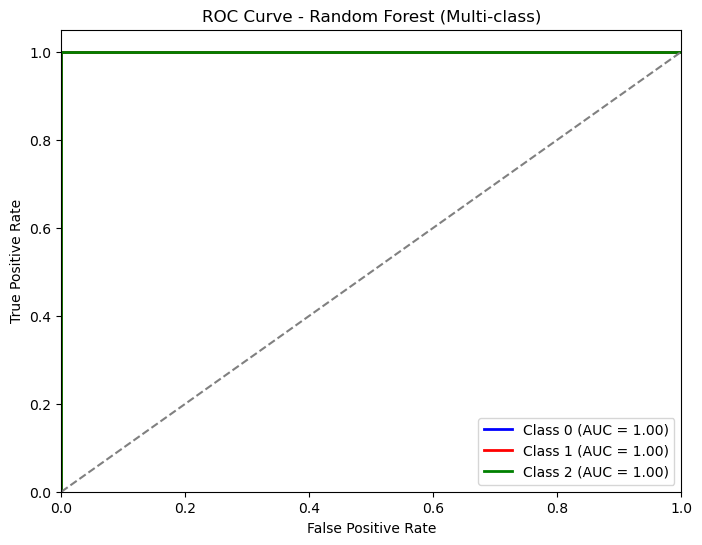

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Load the selected data
selected_data = pd.read_csv('C:/Users/ksultana/Videos/Internship/selected_data.csv')

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(selected_data.drop(columns=['selection_type']), selected_data['selection_type'])

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the grid of hyperparameters for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500, 1000]  # Added max_iter parameter
}

# Initialize GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), 
                              param_grid_lr, 
                              cv=5, 
                              scoring='accuracy')

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Perform grid search using resampled data
grid_search_lr.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params_lr = grid_search_lr.best_params_

# Get the best model
best_model_lr = grid_search_lr.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters for Logistic Regression:")
print(best_params_lr)

# Evaluate the best model on the test data
y_pred_lr = best_model_lr.predict(X_test_resampled)
accuracy_lr = accuracy_score(y_test_resampled, y_pred_lr)
print("Accuracy of Logistic Regression on Test Data:", accuracy_lr)

# Print classification report
report_lr = classification_report(y_test_resampled, y_pred_lr, zero_division=0)
print("Classification Report for Logistic Regression:\n", report_lr)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Perform cross-validation on the Random Forest model
cv_scores_rf = cross_val_score(rf_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Cross-validation scores for Random Forest:", cv_scores_rf)
print("Mean cross-validation accuracy for Random Forest:", np.mean(cv_scores_rf))

# Get predicted probabilities
y_probs_rf = rf_model.predict_proba(X_test_resampled)

# Calculate ROC curve and AUC for each class
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(3):  # Assuming there are 3 classes
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_resampled, y_probs_rf[:, i], pos_label=i)
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc_rf[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Multi-class)')
plt.legend(loc='lower right')
plt.show()


In [21]:
import joblib

# Save the trained Random Forest model
joblib.dump(best_model_rf, 'random_forest_model.pkl')

print("Random Forest model saved successfully!")


Random Forest model saved successfully!
